In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [3]:
rn.seed([42])
m = 3000
n = 1500

a = rn.randn(m, n)

x_true = rn.randn(n)

b = np.matmul(a, x_true)

In [4]:
def grad(a, x, b):    
    tempVec = np.exp(np.matmul(a, x) + b)
    tempVec2 = np.zeros(n)

    for i in range(b.shape[0]):
        tempVec2 = a[i,:]*tempVec[i] + tempVec2
    
    return tempVec2/np.sum(tempVec)

## Gradient Descent

In [5]:
def gradient(x, a, b, t):
    eta = 7e-3
    x = x - eta*grad(a, x, b)
    
    return x

## Accelerated Gradient Descent

In [13]:
def accelgrad(x, y, lam, a, b, t):
    eta = 7e-3
    lamold = lam
    lam = (1 + np.sqrt(1 + 4*lamold**2))/2
    
    gam = (1 - lamold)/lam
    yold = y
    y = x - eta*grad(a, x, b)
    x = (1-gam)*y + gam*yold
    
    return x, y, lam

In [24]:
def descent(update, A, b, T=100):
    x = np.zeros(A.shape[1])
    error = []
    obj = []
    
    for t in range(T):
        xold = x
        x = update(x, A, b, t)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            errortemp = 0
            for i in range(A.shape[0]):
                errortemp += np.exp(np.dot(A[i,:].T, x) + b[i])
            error.append(np.log(errortemp))
            
            assert not np.isnan(error[-1])
    
    return x, error

In [25]:
def descent2(update, A, b, T=100):
    x = np.zeros(A.shape[1])
    y = x
    lam = 0.
    error = []
    obj = []
    
    for t in range(T):
        xold = x
        x, y, lam = update(x, y, lam, A, b, t)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            errortemp = 0
            for i in range(A.shape[0]):
                errortemp += np.exp(np.dot(A[i,:].T, x) + b[i])
            error.append(np.log(errortemp))
            assert not np.isnan(error[-1])
    
    return x, error

In [26]:
x_gd, error_gd = descent(gradient, a, b)

In [27]:
x_ag, error_ag = descent2(accelgrad, a, b)

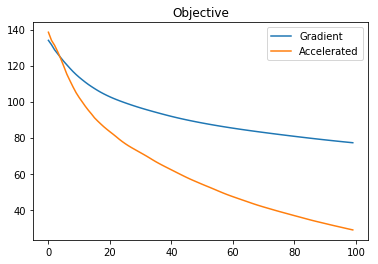

In [29]:
%matplotlib inline
plt.plot(error_gd, label="Gradient")
plt.plot(error_ag, label="Accelerated")
plt.title('Objective')
plt.legend()